In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("../data/adult-data.csv", names=['age', 'workclass', 'fnlwgt', 'education-num',
                                                 'occupation', 'capital-gain', 'capital-loss',
                                                 'hours-per-week', 'income'])

In [4]:
data.head()

,age,workclass,fnlwgt,education-num,occupation,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,13,Adm-clerical,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Exec-managerial,0,0,13,<=50K
2,38,Private,215646,9,Handlers-cleaners,0,0,40,<=50K
3,53,Private,234721,7,Handlers-cleaners,0,0,40,<=50K
4,28,Private,338409,13,Prof-specialty,0,0,40,<=50K


In [5]:
data['workclass'] = LabelEncoder().fit_transform(data['workclass'])
data['occupation'] = LabelEncoder().fit_transform(data['occupation'])
data['income'] = LabelEncoder().fit_transform(data['income'])

In [6]:
X = data.copy()
X.drop("income", inplace = True, axis = 1)
Y = data.income

In [7]:
X_train, X_test = X[:int(X.shape[0]*0.8)].values, X[int(X.shape[0]*0.8):].values
Y_train, Y_test = Y[:int(Y.shape[0]*0.8)].values, Y[int(Y.shape[0]*0.8):].values

In [8]:
train = xgb.DMatrix(X_train, label=Y_train)
test = xgb.DMatrix(X_test, label=Y_test)

In [9]:
test_error = {}

In [10]:
for i in range(20):
    param = {'max_depth':i, 'eta':0.1, 'silent':1, 'objective':'binary:hinge'}
    num_round = 50
    model_metrics = xgb.cv(param, train, num_round, nfold = 10)
    test_error[i] = model_metrics.iloc[-1]['test-error-mean']

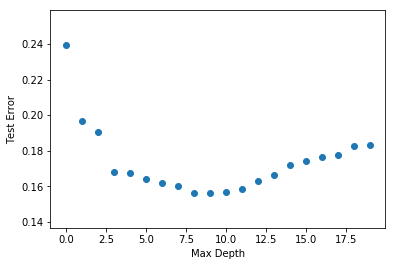

In [11]:
plt.scatter(test_error.keys(),test_error.values())
plt.xlabel('Max Depth')
plt.ylabel('Test Error')
plt.show()

In [12]:
test_error = {}

In [14]:
for i in range(1,100,5):
    param = {'max_depth':9, 'eta':0.001*i, 'silent':1, 'objective':'binary:hinge'}
    num_round = 500
    model_metrics = xgb.cv(param, train, num_round, nfold = 10)
    test_error[i] = model_metrics.iloc[-1]['test-error-mean']

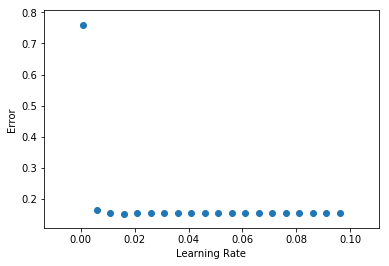

In [15]:
lr = [0.001*(i) for i in test_error.keys()]
plt.scatter(lr,test_error.values())
plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.show()

In [16]:
param = {'max_depth':9, 'eta':0.04, 'silent':1, 'objective':'binary:hinge'}
num_round = 500
model_metrics = xgb.cv(param, train, num_round, nfold = 10)

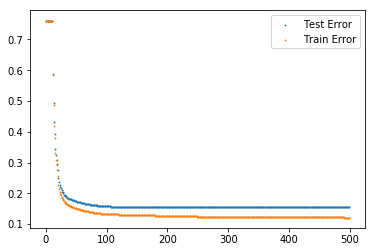

In [17]:
plt.scatter(range(500),model_metrics['test-error-mean'], s = 0.7, label = 'Test Error')
plt.scatter(range(500),model_metrics['train-error-mean'], s = 0.7, label = 'Train Error')
plt.legend()
plt.show()